This notebook visualizes a image version of a nonrobust feature dataset
presented in some of the Madry lab's works.

### Import dependencies

In [1]:
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append("../..")

from adversarial_ntks import dataset
from adversarial_ntks.dataset import Dataset

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


### Data utils

In [3]:
def generate_image_data(
    image_shape: Tuple[int, ...],
    mean: float,
    eps: float,
    p: float,
    rob_feat_loc: Tuple[int, int],
    num_samples: int
) -> Dataset:
    assert num_samples % 2 == 0
    N = num_samples
    
    bool_xs = np.random.random(size=(N,) + image_shape) < p
    dxs = eps * (2 * bool_xs - 1)
    
    xs = np.zeros_like(bool_xs, dtype=np.float64)
    xs[:N // 2] = mean + dxs[:N // 2]
    xs[N // 2:] = mean - dxs[N // 2:]
    
    ys = np.concatenate([
        np.zeros(shape=N // 2, dtype=np.int64),
        np.ones(shape=N // 2, dtype=np.int64)
    ])
    
    xs[:, rob_feat_loc[0], rob_feat_loc[1]] = ys
    
    perm = np.random.permutation(num_samples)
    xs = xs[perm]
    ys = ys[perm]
    
    return Dataset(xs=xs, ys=ys, num_classes=2, one_hot=False)

generate_image_data(
    image_shape=(2, 2),
    mean=0.5,
    eps=8.0/255,
    p=0.99,
    rob_feat_loc=(0, 0),
    num_samples=4,
).xs

array([[[0.        , 0.53137255],
        [0.53137255, 0.53137255]],

       [[1.        , 0.46862745],
        [0.46862745, 0.46862745]],

       [[0.        , 0.53137255],
        [0.53137255, 0.53137255]],

       [[1.        , 0.46862745],
        [0.46862745, 0.46862745]]])

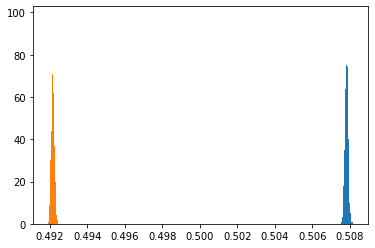

In [4]:
np.random.seed(42)

ds = generate_image_data(
    image_shape=(224, 224),
    mean=0.5,
    eps=4.0/255,
    p=0.75,
    rob_feat_loc=(100, 100),
    num_samples=1000,
)

plt.hist(ds.xs[ds.ys == 0].reshape(ds.xs.shape[0], -1).mean(axis=-1), bins=32);
plt.hist(ds.xs[ds.ys == 1].reshape(ds.xs.shape[0], -1).mean(axis=-1), bins=32);

[1 1 1 0]


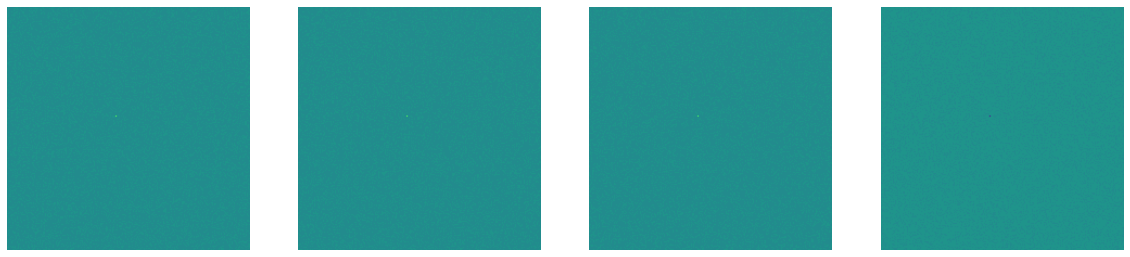

[1 0 0 1]


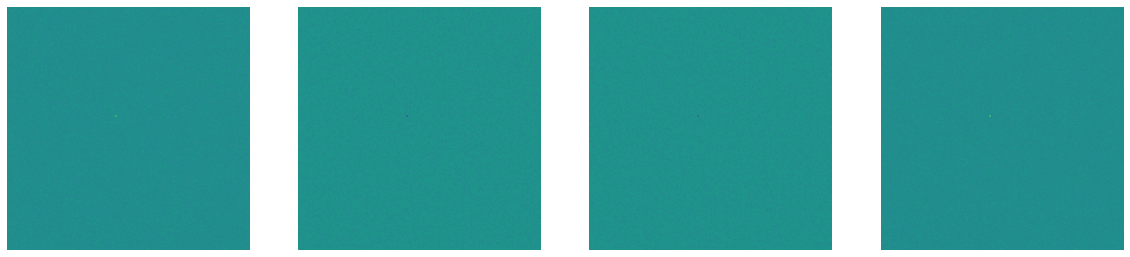

[0 1 0 1]


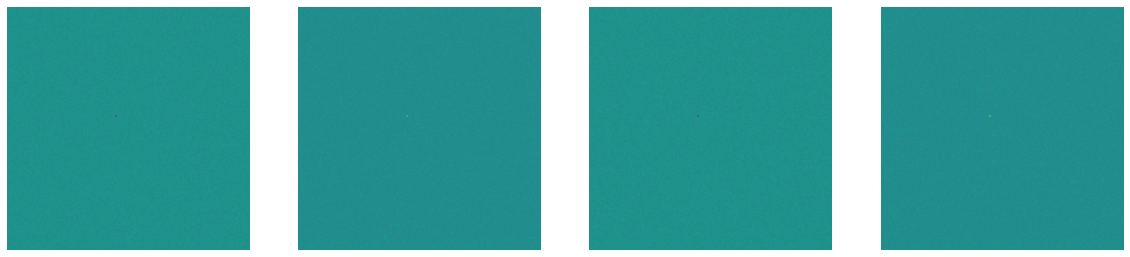

In [5]:
for i in range(3):
    plt.figure(figsize=(20, 20))
    dataset.plot_images(
        ds.rng(4 * i, 4 * i + 4),
        flat=False,
        channels=1,
        num_to_plot=4
    )